In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
from cdlib import algorithms, viz
import pandas as pd

In [2]:
def read_net_w(filename):
    g = nx.Graph()
    with open(filename) as f:
        f.readline()
        for l in f:
            l = l.split(",")
            g.add_node(l[0], bipartite = 0)
            g.add_node(l[1], bipartite = 1)
            g.add_edge(l[0], l[1], weight=int(l[2]))
            
    return g

g = read_net_w(f'Data/weighted_net_amsterdam.csv')
sock = pd.read_csv(r"C:\Users\Gianmarco\Dropbox\Il mio PC (DESKTOP-DM1F9TN)\Desktop\SocialNetworkAnalysis\progetto\Data\listings_amsterdam.csv")

In [3]:
top_nodes = {n for n, d in g.nodes(data=True) if d["bipartite"] == 0}
bottom_nodes = set(g) - top_nodes #to obtain 2 set of nodes. 
                                  #This is usefull because a lot of bipartite functions need a set of nodes
print(len(top_nodes))
print(len(bottom_nodes))

11110
156


In [4]:
# to hold weight of the original bi graph
def my_weight(G, u, v, weight="weight"):
    w = 0
    for nbr in set(G[u]) & set(G[v]):
        w += G[u][nbr].get(weight, 1) + G[v][nbr].get(weight, 1)
    return w

In [5]:
g_l = bipartite.generic_weighted_projected_graph(g, list(bottom_nodes), weight_function=my_weight)
print(nx.info(g_l))

Name: 
Type: Graph
Number of nodes: 156
Number of edges: 701
Average degree:   8.9872


In [6]:
listings = pd.read_csv(r"C:\Users\Gianmarco\Dropbox\Il mio PC (DESKTOP-DM1F9TN)\Desktop\SocialNetworkAnalysis\progetto\Data\listings_amsterdam.csv")
listings = listings[listings.reviewnumber != '[]' ]
listings = listings[listings.rating != '[]' ]
info = listings[['listing_id','rating']]
info = info.astype({"rating": float}).astype({"rating": int})

In [7]:
dizio = {}
for _, row in info.iterrows():
    dizio[str(row['listing_id'])] = row['rating']    

In [8]:
nx.set_node_attributes(g_l, dizio, "rating")

In [9]:
for u,data in g_l.nodes(data=True):
    del data['bipartite']

In [10]:
for u,data in g_l.nodes(data = True):
    print(u,data)

6512505 {'rating': 4}
32008398 {'rating': 5}
11708784 {'rating': 4}
6845563 {'rating': 4}
9996040 {'rating': 4}
3259374 {'rating': 5}
17986807 {'rating': 4}
25992447 {'rating': 5}
16401807 {'rating': 4}
15959684 {'rating': 5}
13189108 {'rating': 4}
35377242 {'rating': 4}
21188482 {'rating': 4}
2472277 {'rating': 4}
28042923 {'rating': 4}
4076501 {'rating': 4}
13526838 {}
14998245 {'rating': 4}
19890254 {'rating': 4}
759060 {'rating': 4}
17632137 {'rating': 4}
2661450 {'rating': 5}
37161821 {'rating': 4}
4119684 {'rating': 4}
16081933 {'rating': 4}
23747999 {'rating': 4}
15110159 {'rating': 4}
23493592 {'rating': 4}
20702723 {'rating': 4}
8398522 {'rating': 4}
35505451 {}
14622016 {'rating': 4}
31148061 {'rating': 5}
835550 {'rating': 4}
1321735 {'rating': 4}
761411 {'rating': 4}
24117588 {'rating': 4}
39149225 {'rating': 5}
8874073 {'rating': 4}
30140860 {'rating': 4}
19242200 {'rating': 5}
25310162 {'rating': 4}
1924194 {'rating': 4}
16804326 {'rating': 4}
15595655 {'rating': 4}
38505

# Local assortative measures to discovery sockpuppets house

###### Multiscale Mixing Patterns

In [11]:
from MultiscaleMixing import loadNetwork
from MultiscaleMixing import localassort

In [12]:
mancanti = {}
for u,data in g_l.nodes(data=True):
    try:
        print(data['rating'])
    except:
        mancanti[u] = 1
        

4
5
4
4
4
5
4
5
4
5
4
4
4
4
4
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
5
4
4
4
4
5
4
4
5
4
4
4
4
4
4
4
5
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
4
4
4
4
4
4
4
5
4
4
4
4
4
4
4
4
4
5
4
4
4
5
4
4
4
4
4
5
5
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
4
4
4
4
4
4


In [13]:
nx.set_node_attributes(g_l, mancanti, "rating")

In [14]:
for u,data in g_l.nodes(data=True):
    print(u,data)

6512505 {'rating': 4}
32008398 {'rating': 5}
11708784 {'rating': 4}
6845563 {'rating': 4}
9996040 {'rating': 4}
3259374 {'rating': 5}
17986807 {'rating': 4}
25992447 {'rating': 5}
16401807 {'rating': 4}
15959684 {'rating': 5}
13189108 {'rating': 4}
35377242 {'rating': 4}
21188482 {'rating': 4}
2472277 {'rating': 4}
28042923 {'rating': 4}
4076501 {'rating': 4}
13526838 {'rating': 1}
14998245 {'rating': 4}
19890254 {'rating': 4}
759060 {'rating': 4}
17632137 {'rating': 4}
2661450 {'rating': 5}
37161821 {'rating': 4}
4119684 {'rating': 4}
16081933 {'rating': 4}
23747999 {'rating': 4}
15110159 {'rating': 4}
23493592 {'rating': 4}
20702723 {'rating': 4}
8398522 {'rating': 4}
35505451 {'rating': 1}
14622016 {'rating': 4}
31148061 {'rating': 5}
835550 {'rating': 4}
1321735 {'rating': 4}
761411 {'rating': 4}
24117588 {'rating': 4}
39149225 {'rating': 5}
8874073 {'rating': 4}
30140860 {'rating': 4}
19242200 {'rating': 5}
25310162 {'rating': 4}
1924194 {'rating': 4}
16804326 {'rating': 4}
155956

In [15]:
h = g_l.copy()

In [16]:
# remap house names into integers (required by the algorithm)
nodes_label = list(dict(g_l.nodes(data=True)).items())
houses = {h[1]['rating']: None for h in nodes_label}
houses = {h: i for i, h in enumerate(houses.keys())}

# relabeling nodes starting from 0 (required by the algorithm)
mapping = {n: i for i, n in enumerate(g_l.nodes())}
g_l = nx.relabel_nodes(g_l, mapping)

to_save_net = open('Data/tmp_net.txt', 'w')
to_save_labs = open('Data/tmp_labels.txt', 'w')

for u, v in g_l.edges():
    to_save_net.write(str(u) + " " + str(v))
    to_save_net.write("\n")
to_save_net.close()    

for n in g_l.nodes():
    to_save_labs.write(str(houses[g_l.nodes[n]['rating']]))
    to_save_labs.write("\n")
to_save_labs.close()

E, M = loadNetwork.load('Data/tmp_net.txt', 'Data/tmp_labels.txt', zero_index=0)

In [17]:
assortM, assortT, Z = localassort.localAssortF(E,M,pr=np.arange(0,1,0.1))

[ 4  2  4  4  9  4 19  8  8  4  1  8  6  4  5 19  7 12 11  8  9 12 11  4
  4  5 27 19 14  4  5 19 19 14  7  6  7  4  7  6  9 15 14  5  7  9 14  9
  7 11  8  6  5  4 14  7 15  0  5  5  5  8  5 14  7  6  5  9  6  4  7  5
  5  8 12  8  9 19  8  5  2  8  9  9 14 11  7  5  8 19  4  2 14  4 19 20
  5  7 22 14 19 14  5  7  4  1  8  9  8  6 19  7  6 19  8  7  9  5  4  9
  7 11 11 19  5  4  9 19  1  7 19  7 19 14  5 11  7 14  7  7 19  9  7  6
  5 11  6  6  8  6 20  2  5 19 11  8]


C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:62: RuntimeWarning: divide by zero encountered in true_divide
  D = sparse.diags(1./degree, 0, format='csc')
C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:78: RuntimeWarning: invalid value encountered in true_divide
  Z = (W @ Z) / degree
C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:120: RuntimeWarning: invalid value encountered in true_divide
  e_gh /= e_gh_sum


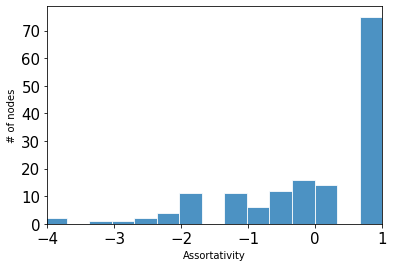

In [23]:
plt.hist(assortT, bins=15, alpha=0.8, edgecolor='white')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Assortativity')
plt.ylabel('# of nodes')
plt.xlim((-4,1))
plt.show()

In [19]:
node_assortativity = {i: v for i, v in enumerate(assortT)}
reverse_map = {v: k for k, v in mapping.items()}
node_assortativity = {reverse_map[i]: v for i, v in node_assortativity.items()}

In [20]:
node_assortativity = [(k, v) for k, v in sorted(node_assortativity.items(), key=lambda item: item[1])]

In [21]:
#Most disassortative house

In [22]:
for nd in node_assortativity[:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['rating']: >20}")

            13526838	-4.046298720970232	                   1
            24789739	-4.046298720970232	                   5
             7812608	-3.0921313573881664	                   4
            31148061	-2.769446886900268	                   5
            35505451	-2.498940627666952	                   1


In [23]:
sock.loc[sock['listing_id'].isin([a[0] for a in node_assortativity[:5]])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
147,7812608,villadepijp + free bicycles,Stanza privata in suite degli ospiti - Host: M...,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Wi-fi', 'TV con via cavo standard', 'Lavatri...",4.92,https://www.airbnb.it/rooms/7812608?,(266 recensioni)
157,31148061,Luxury Apartment/Near Vondelpark/Close to central,Intero appartamento - Host: Daley,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",5.0,https://www.airbnb.it/rooms/31148061?,(3 recensioni)
159,35505451,Marvelous Family House with Rooftop @ Vondelpark,Intero appartamento - Host: Maarten,"['4 ospiti', '3 camere da letto', '4 letti', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",[],https://www.airbnb.it/rooms/35505451?,1 recensione
161,13526838,Baanakkerspark amsterdam,Intero appartamento - Host: Jos,"['4 ospiti', '2 camere da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'Parcheggio gratuito inclu...",[],https://www.airbnb.it/rooms/13526838?,2 recensioni
162,24789739,Amsterdam Baanakkerspark.,Stanza privata in appartamento - Host: Jos,"['2 ospiti', '1 camera da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'Parcheggio gratuito inclu...",5.0,https://www.airbnb.it/rooms/24789739?,(10 recensioni)


2 sockpuppets!!

In [24]:
#Less disassortative house

In [34]:
for nd in list(reversed(node_assortativity[-10:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['rating']: >20}")

            20878711	       1.0	                   4
            18950531	       1.0	                   4
            33990484	       1.0	                   4
            22566099	       1.0	                   4
            34882977	       1.0	                   4
             2429334	       1.0	                   4
            21354405	       1.0	                   4
            26560199	       1.0	                   4
            26000561	       1.0	                   4


###### Conformity

In [16]:
from conformity import attribute_conformity
import pandas as pd

In [17]:
gcc = sorted(nx.connected_components(h), key=len, reverse=True)
h0 = h.subgraph(gcc[0])

In [18]:
alphas = [1.0, 2.0, 3.0, 4.0, 5.0] # decay factors
res = attribute_conformity(h0, alphas, ['rating'], profile_size=1)

100%|███████████████████████████████████████████████████████████████████████████████| 117/117 [00:01<00:00, 100.11it/s]


In [27]:
gcc

[{'10240434',
  '1035801',
  '10923071',
  '1155251',
  '12002357',
  '1230403',
  '1246308',
  '12475352',
  '12801514',
  '12840460',
  '12877936',
  '12897197',
  '13135409',
  '13189108',
  '13502166',
  '13825291',
  '14173331',
  '14245271',
  '14313251',
  '14314114',
  '14412610',
  '14610348',
  '14622016',
  '14792704',
  '14829814',
  '14998245',
  '15110159',
  '15110564',
  '15564496',
  '15726563',
  '15780515',
  '1583266',
  '15959684',
  '1601408',
  '1605387',
  '16081933',
  '16277689',
  '16696921',
  '16804326',
  '17005568',
  '17401373',
  '17859181',
  '17862359',
  '17986807',
  '18514561',
  '1924194',
  '19242200',
  '19796378',
  '1986095',
  '19890254',
  '20321345',
  '20651079',
  '20908840',
  '21188482',
  '21374801',
  '21744543',
  '22092298',
  '23429851',
  '23493592',
  '24117588',
  '24615621',
  '24628192',
  '2472277',
  '24827860',
  '2497346',
  '24981353',
  '25310162',
  '25992447',
  '2661450',
  '2700366',
  '27523926',
  '27525864',
  '27

In [22]:
conf_a3 = res['3.0']['rating']
node_assortativity = [(k, v) for k, v in sorted(conf_a3.items(), key=lambda item: item[1])]

In [24]:
node_assortativity

[('39149225', -0.8842510438342566),
 ('27523926', -0.8781386356625928),
 ('17005568', -0.7433533998707179),
 ('15959684', -0.7116004799633525),
 ('2661450', -0.6653275860330661),
 ('19242200', -0.6653275860330661),
 ('23429851', -0.6259505165937845),
 ('14610348', -0.6259505165937845),
 ('29984774', -0.6259505165937845),
 ('3259374', -0.3931615668574447),
 ('25992447', -0.3931615668574447),
 ('27525864', -0.3931615668574447),
 ('20651079', 0.29097456354755274),
 ('18514561', 0.29097456354755274),
 ('8269677', 0.29097456354755274),
 ('24615621', 0.29097456354755274),
 ('1601408', 0.49833000312220405),
 ('759060', 0.563140582723174),
 ('1155251', 0.563140582723174),
 ('3428947', 0.563140582723174),
 ('927119', 0.563140582723174),
 ('24981353', 0.563140582723174),
 ('13189108', 0.5705644965077288),
 ('4076501', 0.5705644965077288),
 ('23493592', 0.5705644965077288),
 ('12897197', 0.5705644965077288),
 ('21374801', 0.570564496507729),
 ('4259933', 0.570564496507729),
 ('14792704', 0.570564

In [23]:
#Most disassortative house
for nd in node_assortativity[0:10]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['rating']: >20}")

            39149225	-0.8842510438342566	                   5
            27523926	-0.8781386356625928	                   5
            17005568	-0.7433533998707179	                   5
            15959684	-0.7116004799633525	                   5
             2661450	-0.6653275860330661	                   5


In [43]:
sock.loc[sock['listing_id'].isin([a[0] for a in node_assortativity[:6]])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
36,2661450,Apartment @ Amsterdam Canals,Intero appartamento - Host: Arun,"['4 ospiti', '2 camere da letto', '4 letti', '...","['Cucina', 'Wi-fi', 'TV con via cavo standard'...",5.0,https://www.airbnb.it/rooms/2661450?,(7 recensioni)
40,19242200,Stylish & cosy apartment in Amsterdam West/Center,Intero appartamento - Host: Josh,"['4 ospiti', '2 camere da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",5.0,https://www.airbnb.it/rooms/19242200?,(9 recensioni)
62,15959684,Peaceful apartment next to Vondelpark&Museumsq...,Intero appartamento - Host: Sjoerd,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV con via cavo standard'...",5.0,https://www.airbnb.it/rooms/15959684?,(23 recensioni)
63,17005568,Gorgeous loft in the heart of Amsterdam's museums,Intero appartamento - Host: Jacqueline,"['2 ospiti', '2 camere da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'Lavatrice', 'Aria condizi...",5.0,https://www.airbnb.it/rooms/17005568?,(6 recensioni)
125,27523926,Complete apartment-taking care of our cat requ...,Intero condominio - Host: Bastiaan,"['1 ospite', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",5.0,https://www.airbnb.it/rooms/27523926?,(4 recensioni)
138,39149225,Cozy upper floor apartment in Amsterdam West,Intero appartamento - Host: Robert,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV con via cavo standard'...",5.0,https://www.airbnb.it/rooms/39149225?,(3 recensioni)


In [42]:
#Less disassortative house
for nd in list(reversed(node_assortativity[-7:-1])):
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h.nodes[nd[0]]['rating']: >20}")

            14829814	0.996176202329394	                   4
            12002357	0.996176202329394	                   4
              835550	0.996176202329394	                   4
              761411	0.9942874019465073	                   4
            14622016	0.993987313356051	                   4
            24827860	0.9895930648138055	                   4


In [21]:
sock.loc[sock['listing_id'].isin(['12002357','13825291','14829814','761411','14622016','24827860'])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
29,12002357,Light spacious apt nearby Pijp area,Intero appartamento - Host: Gerard,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Sono permessi soggiorni a lungo termine', 'N...",4.43,https://www.airbnb.it/rooms/12002357?,(22 recensioni)
30,13825291,"Beautiful apt, full of light. 50 mts from RAI",Intero appartamento - Host: Pablo,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",4.76,https://www.airbnb.it/rooms/13825291?,(27 recensioni)
31,14622016,Modern & luxurious 2 bedroom in CITY CENTER,Intero appartamento - Host: Pauline,"['4 ospiti', '2 camere da letto', '2 letti', '...","['Cucina', 'TV con via cavo standard', 'Lavatr...",4.57,https://www.airbnb.it/rooms/14622016?,(65 recensioni)
32,14829814,Large apartment at the buzzing Overtoom street,Intero appartamento - Host: Bjorn,"['4 ospiti', '2 camere da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'TV con via cavo standard'...",4.20,https://www.airbnb.it/rooms/14829814?,(5 recensioni)
42,761411,30% discount A'dam Apartment - Clean Quiet Safe,Stanza privata in appartamento - Host: Xsjong,"['1 ospite', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'Parcheggio gratuito inclu...",4.74,https://www.airbnb.it/rooms/761411?,(251 recensioni)
146,24827860,Modern bright apartment in popular area The Pijp,Intero appartamento - Host: Bibi,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",4.95,https://www.airbnb.it/rooms/24827860?,(22 recensioni)


In [20]:
sock.loc[sock['listing_id'].isin(['23819110','34882977','33990484'])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
149,23819110,Spacious studio with terrace on waterside,Stanza privata in loft - Host: Marguerite,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Lungomare', 'Cucina', 'Wi-fi', 'Parcheggio g...",5.0,https://www.airbnb.it/rooms/23819110?,(26 recensioni)
169,33990484,Lovely bright apartment near Vondelpark,Intero appartamento - Host: Fleur,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'Animali domestici ammessi...",4.93,https://www.airbnb.it/rooms/33990484?,(29 recensioni)
170,34882977,"Great apartment in ""Pijp"" area, with large gar...",Intero appartamento - Host: Asya,"['4 ospiti', '1 camera da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Cortil...",4.55,https://www.airbnb.it/rooms/34882977?,(11 recensioni)


Best strategy is to calculate the most disassortative house, so we will try to discovery other sock puppet account on each community

In [24]:
import pickle


with open('communities.txt', 'rb') as c:
    comm = pickle.load(c)

with open('fielder.txt', 'rb') as f:
    fielder = pickle.load(f)

with open('case.txt', 'rb') as h:
    case = pickle.load(h)

In [16]:
# community 1

In [66]:
gg1 = g_l.subgraph(comm[0])

In [67]:
print(nx.info(gg1))

Name: 
Type: Graph
Number of nodes: 71
Number of edges: 249
Average degree:   7.0141


In [68]:
h1 = gg1.copy()

In [69]:
# remap house names into integers (required by the algorithm)
nodes_label = list(dict(gg1.nodes(data=True)).items())
houses = {h1[1]['rating']: None for h1 in nodes_label}
houses = {h1: i for i, h1 in enumerate(houses.keys())}

# relabeling nodes starting from 0 (required by the algorithm)
mapping = {n: i for i, n in enumerate(gg1.nodes())}
gg1 = nx.relabel_nodes(gg1, mapping)

to_save_net = open('Data/tmp_net1.txt', 'w')
to_save_labs = open('Data/tmp_labels1.txt', 'w')

for u, v in gg1.edges():
    to_save_net.write(str(u) + " " + str(v))
    to_save_net.write("\n")
to_save_net.close()    

for n in gg1.nodes():
    to_save_labs.write(str(houses[gg1.nodes[n]['rating']]))
    to_save_labs.write("\n")
to_save_labs.close()

E1, M1 = loadNetwork.load('Data/tmp_net1.txt', 'Data/tmp_labels1.txt', zero_index=0)

In [70]:
assortM1, assortT1, Z1 = localassort.localAssortF(E1,M1,pr=np.arange(0,1,0.8))

In [71]:
node_assortativity = {i: v for i, v in enumerate(assortT1)}
reverse_map = {v: k for k, v in mapping.items()}
node_assortativity = {reverse_map[i]: v for i, v in node_assortativity.items()}

In [72]:
node_assortativity = [(k, v) for k, v in sorted(node_assortativity.items(), key=lambda item: item[1])]

In [25]:
sock.loc[sock['listing_id'].isin([a[0] for a in node_assortativity[:5]])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
95,32008398,"Amsterdam Appartement, superb centrally located",Intero appartamento - Host: Dave,"['4 ospiti', '1 camera da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",5.0,https://www.airbnb.it/rooms/32008398?,(10 recensioni)
103,14610348,Spacious apartment canal view and a large balcony,Intero appartamento - Host: Stephanie,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Patio o balcone', '...",5.0,https://www.airbnb.it/rooms/14610348?,(27 recensioni)
109,23429851,Great central located apartment with balcony,Intero appartamento - Host: Manouk,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Sono permessi soggi...",5.0,https://www.airbnb.it/rooms/23429851?,(4 recensioni)
161,13526838,Baanakkerspark amsterdam,Intero appartamento - Host: Jos,"['4 ospiti', '2 camere da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'Parcheggio gratuito inclu...",[],https://www.airbnb.it/rooms/13526838?,2 recensioni
162,24789739,Amsterdam Baanakkerspark.,Stanza privata in appartamento - Host: Jos,"['2 ospiti', '1 camera da letto', '2 letti', '...","['Cucina', 'Wi-fi', 'Parcheggio gratuito inclu...",5.0,https://www.airbnb.it/rooms/24789739?,(10 recensioni)


In [26]:
#community 4

In [36]:
gg4 = g_l.subgraph(comm[3])

In [37]:
h4 = gg4.copy()

In [38]:
# remap house names into integers (required by the algorithm)
nodes_label = list(dict(gg4.nodes(data=True)).items())
houses = {h4[1]['rating']: None for h4 in nodes_label}
houses = {h4: i for i, h4 in enumerate(houses.keys())}

# relabeling nodes starting from 0 (required by the algorithm)
mapping = {n: i for i, n in enumerate(gg4.nodes())}
gg4 = nx.relabel_nodes(gg4, mapping)

to_save_net = open('Data/tmp_net4.txt', 'w')
to_save_labs = open('Data/tmp_labels4.txt', 'w')

for u, v in gg4.edges():
    to_save_net.write(str(u) + " " + str(v))
    to_save_net.write("\n")
to_save_net.close()    

for n in gg4.nodes():
    to_save_labs.write(str(houses[gg4.nodes[n]['rating']]))
    to_save_labs.write("\n")
to_save_labs.close()

E4, M4 = loadNetwork.load('Data/tmp_net4.txt', 'Data/tmp_labels4.txt', zero_index=0)

In [39]:
assortM4, assortT4, Z4 = localassort.localAssortF(E1,M1,pr=np.arange(0,1,0.8))

In [40]:
node_assortativity = {i: v for i, v in enumerate(assortT4)}
reverse_map = {v: k for k, v in mapping.items()}
node_assortativity = {reverse_map[i]: v for i, v in node_assortativity.items()}

In [41]:
node_assortativity = [(k, v) for k, v in sorted(node_assortativity.items(), key=lambda item: item[1])]

In [42]:
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h4.nodes[nd[0]]['rating']: >20}")

            31148061	-3.636675123928837	                   5
            35505451	-3.3039340930330354	                   0
            35271224	-3.3039340930330354	                   0
            29984774	-3.063306220669037	                   5
            27525864	-2.7222633226290935	                   5


In [44]:
sock.loc[sock['listing_id'].isin([a[0] for a in node_assortativity[:5]])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
111,29984774,Houseboat heart of Jordaan,Casa galleggiante - Host: Lotte,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'Animali domestici ammessi...",5.0,https://www.airbnb.it/rooms/29984774?,(5 recensioni)
118,27525864,New & spacious ground-floor 3-BR home w/ garden!,Intera casa - Host: Laurens,"['6 ospiti', '3 camere da letto', '3 letti', '...","['Cucina', 'Wi-fi', 'TV con via cavo standard'...",5.0,https://www.airbnb.it/rooms/27525864?,(12 recensioni)
157,31148061,Luxury Apartment/Near Vondelpark/Close to central,Intero appartamento - Host: Daley,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",5.0,https://www.airbnb.it/rooms/31148061?,(3 recensioni)
158,35271224,Urban oasis: Modern ground floor apartment!,Intera casa - Host: Stephanie,"['4 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV con via cavo standard'...",[],https://www.airbnb.it/rooms/35271224?,1 recensione
159,35505451,Marvelous Family House with Rooftop @ Vondelpark,Intero appartamento - Host: Maarten,"['4 ospiti', '3 camere da letto', '4 letti', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",[],https://www.airbnb.it/rooms/35505451?,1 recensione


In [45]:
gg2 = g_l.subgraph(comm[1])

In [46]:
h2 = gg2.copy()

In [47]:
# remap house names into integers (required by the algorithm)
nodes_label = list(dict(gg2.nodes(data=True)).items())
houses = {h2[1]['rating']: None for h2 in nodes_label}
houses = {h2: i for i, h2 in enumerate(houses.keys())}

# relabeling nodes starting from 0 (required by the algorithm)
mapping = {n: i for i, n in enumerate(gg2.nodes())}
gg2 = nx.relabel_nodes(gg2, mapping)

to_save_net = open('Data/tmp_net2.txt', 'w')
to_save_labs = open('Data/tmp_labels2.txt', 'w')

for u, v in gg2.edges():
    to_save_net.write(str(u) + " " + str(v))
    to_save_net.write("\n")
to_save_net.close()    

for n in gg2.nodes():
    to_save_labs.write(str(houses[gg2.nodes[n]['rating']]))
    to_save_labs.write("\n")
to_save_labs.close()

E2, M2 = loadNetwork.load('Data/tmp_net2.txt', 'Data/tmp_labels2.txt', zero_index=0)

In [48]:
assortM2, assortT2, Z2 = localassort.localAssortF(E2,M2,pr=np.arange(0,1,0.8))

In [49]:
node_assortativity = {i: v for i, v in enumerate(assortT2)}
reverse_map = {v: k for k, v in mapping.items()}
node_assortativity = {reverse_map[i]: v for i, v in node_assortativity.items()}

In [50]:
node_assortativity = [(k, v) for k, v in sorted(node_assortativity.items(), key=lambda item: item[1])]

In [52]:
for nd in node_assortativity[0:5]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h2.nodes[nd[0]]['rating']: >20}")

             7812608	-3.1053643301888543	                   4
            23819110	-2.009817834905573	                   5
            22026123	-2.009817834905573	                   5
            26000561	       1.0	                   4
            23747999	       1.0	                   4


In [53]:
sock.loc[sock['listing_id'].isin([a[0] for a in node_assortativity[:5]])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
147,7812608,villadepijp + free bicycles,Stanza privata in suite degli ospiti - Host: M...,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Wi-fi', 'TV con via cavo standard', 'Lavatri...",4.92,https://www.airbnb.it/rooms/7812608?,(266 recensioni)
148,22026123,Stylish & comfortable apartment in the city ce...,Intero appartamento - Host: Geertje,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",5.0,https://www.airbnb.it/rooms/22026123?,(12 recensioni)
149,23819110,Spacious studio with terrace on waterside,Stanza privata in loft - Host: Marguerite,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Lungomare', 'Cucina', 'Wi-fi', 'Parcheggio g...",5.0,https://www.airbnb.it/rooms/23819110?,(26 recensioni)
167,23747999,Rivierenbuurt,Intero appartamento - Host: Paskalle,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Patio o balcone', '...",4.91,https://www.airbnb.it/rooms/23747999?,(11 recensioni)
168,26000561,Cosy apartment in the centre of Amsterdam,Intero appartamento - Host: Demi,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Asciug...",4.88,https://www.airbnb.it/rooms/26000561?,(16 recensioni)


In [55]:
gg3 = g_l.subgraph(comm[2])

In [56]:
h3 = gg3.copy()

In [57]:
# remap house names into integers (required by the algorithm)
nodes_label = list(dict(gg3.nodes(data=True)).items())
houses = {h3[1]['rating']: None for h3 in nodes_label}
houses = {h3: i for i, h3 in enumerate(houses.keys())}

# relabeling nodes starting from 0 (required by the algorithm)
mapping = {n: i for i, n in enumerate(gg3.nodes())}
gg3 = nx.relabel_nodes(gg3, mapping)

to_save_net = open('Data/tmp_net3.txt', 'w')
to_save_labs = open('Data/tmp_labels3.txt', 'w')

for u, v in gg3.edges():
    to_save_net.write(str(u) + " " + str(v))
    to_save_net.write("\n")
to_save_net.close()    

for n in gg3.nodes():
    to_save_labs.write(str(houses[gg3.nodes[n]['rating']]))
    to_save_labs.write("\n")
to_save_labs.close()

E3, M3 = loadNetwork.load('Data/tmp_net3.txt', 'Data/tmp_labels3.txt', zero_index=0)

In [58]:
assortM3, assortT3, Z3 = localassort.localAssortF(E3,M3,pr=np.arange(0,1,0.8))

C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:62: RuntimeWarning: divide by zero encountered in true_divide
  D = sparse.diags(1./degree, 0, format='csc')
C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:74: RuntimeWarning: invalid value encountered in true_divide
  Z = (W @ Z) / degree
C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:116: RuntimeWarning: invalid value encountered in true_divide
  e_gh /= e_gh_sum
C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:121: RuntimeWarning: invalid value encountered in true_divide
  np.divide(assortT, 1.-ab_glob, out=assortT, where=ab_glob != 0)
C:\Users\Gianmarco\Desktop\SocialNetworkAnalysis\progetto\MultiscaleMixing\localassort.py:125: RuntimeWarning: divide by zero encountered in true_divide
  np.divide(assortM, 1.-ab_glob, out=assortM, where=ab_glob != 0)
C:\Users\Gianmarco\

In [59]:
node_assortativity = {i: v for i, v in enumerate(assortT3)}
reverse_map = {v: k for k, v in mapping.items()}
node_assortativity = {reverse_map[i]: v for i, v in node_assortativity.items()}

In [60]:
node_assortativity = [(k, v) for k, v in sorted(node_assortativity.items(), key=lambda item: item[1])]

In [62]:
for nd in node_assortativity[:]:
    print(f"{nd[0]: >20}\t{nd[1]: >10}\t{h3.nodes[nd[0]]['rating']: >20}")

            17632137	       nan	                   4
                2818	       nan	                   4
            15458166	       nan	                   4
            26560199	       nan	                   4
            17434174	       nan	                   5
            20203218	       nan	                   4


In [63]:
sock.loc[sock['listing_id'].isin([a[0] for a in node_assortativity[:]])]

,listing_id,title,toprow,roominfo,facilities,rating,link,reviewnumber
0,2818,@ Daniel's (camera vista giardino),Stanza privata in appartamento - Host: Daniel,"['2 ospiti', '1 camera da letto', '2 letti', '...","['Wi-fi', 'Lavatrice', 'Cortile', 'Asciugacape...",4.88,https://www.airbnb.it/rooms/2818?,(278 recensioni)
2,15458166,Private room with canal view,Stanza privata in casa a schiera - Host: Malti,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Accesso alla spiaggia (sul lungomare)', 'Cuc...",4.83,https://www.airbnb.it/rooms/15458166?,(78 recensioni)
3,17632137,"Modern 2P apt at historic Dappermarket | Zoo, ...",Intero appartamento - Host: Guido,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Cucina', 'Wi-fi', 'TV', 'Lavatrice', 'Frigor...",4.36,https://www.airbnb.it/rooms/17632137?,(25 recensioni)
4,20203218,"Private room in Eastern Docklands, Amsterdam",Stanza privata in casa - Host: Carolyn,"['2 ospiti', '1 camera da letto', '1 letto', '...","['Lungomare', 'Wi-fi', 'Vasca da bagno', 'Gioc...",4.85,https://www.airbnb.it/rooms/20203218?,(26 recensioni)
5,26560199,Sea side of Amsterdam,Intero appartamento - Host: Tony,"['3 ospiti', 'Monolocale', '2 letti', '1 bagno']","['Cucina', 'Wi-fi', 'Ascensore', 'Lavatrice', ...",4.73,https://www.airbnb.it/rooms/26560199?,(15 recensioni)
163,17434174,"Sunny design studio, central with roofterrace",Stanza privata in appartamento - Host: Ot,"['2 ospiti', 'Monolocale', '1 letto', '1 bagno...","['Cucina', 'Wi-fi', 'Asciugacapelli', 'Spazio ...",5.0,https://www.airbnb.it/rooms/17434174?,(32 recensioni)


## Searching on clique

In [88]:
max_cliques = list(nx.find_cliques(g_l))

In [91]:
[e for e in max_cliques if len(e)==2]

[['14173331', '2763386'],
 ['15959684', '1601408'],
 ['13526838', '24789739'],
 ['14622016', '17401373'],
 ['761411', '1583266'],
 ['30140860', '654931'],
 ['16277689', '16696921'],
 ['16081933', '15780515'],
 ['4119684', '12801514'],
 ['4119684', '8706862'],
 ['2761156', '654931'],
 ['2761156', '24628192'],
 ['14998245', '20321345'],
 ['1583266', '654931'],
 ['3003918', '15110564']]